<a id='top'></a>

# CSCI3022 S22



# Homework 5: Confidence Intervals

## Due Monday, April 4 at 11:59 pm to Canvas and Gradescope
***

**Name**: ________________________________________________________________________

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline


---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---


[Back to top](#top)

<a id='p1'></a>

## (15 pts) Problem 1 (Computation): How did we do?
***

In prior (and future) homeworks and the exam coding, we have placed a large emphasis on using **simulations** to estimate probabilities.  In these cases, we're actually simulating a process or game and then counting outcomes as *proportions* to estimate what we believe are the exact *probabilities*.

On Homework 3 we we just stated that our simulated *proportions* would match the theoretical *probabilities* if our sample size was large enough.  But it's important in data science to always convey our sense of error, in some form of **uncertainty quantification**.  Confidence intervals are a simple way to do this!

**A**: For *your* results from the "poker hands" problem of HW 3 Problem 2, what is the corresponding 99% confidence interval on the probability of getting 3-of-a-kind?

*Note:* If you didn't actually do this problem, you may use the solution simulation values of 213 "3-of-a-kind" hands in 10000 simulations.  But use your own exact value if possible!

In [42]:
phat=213/10000
zcrit=stats.norm.ppf(.995)
se=np.sqrt(phat*(1-phat)/10000)
print('CI of:', phat-zcrit*se,phat+zcrit*se)

CI of: 0.017580952926315202 0.025019047073684797


**B**: For *your* results from the "NFL overtime" problem of HW 3 Problem 3, what is the 99% corresponding confidence interval on how much more likely it is for team 1 (receiving the ball first) to win than team 2?

*Note:* If you didn't actually do this problem, you may use the solution simulation values of 542 "team 1 wins" and 321 "team 2 wins" in 1000 simulations.  But use your own exact values if possible!

In [41]:
p1hat=542/1000
p2hat=321/1000
diff=p1hat-p2hat
zcrit=stats.norm.ppf(.995)
se=np.sqrt(p1hat*(1-p1hat)/1000+p2hat*(1-p2hat)/1000)
print('CI of:', diff-zcrit*se,diff+zcrit*se)

CI of: 0.16538385467408695 0.2766161453259131


[Back to top](#top)

<a id='p2'></a>

## (10 pts) Problem 2 (Theory): How big a Sample?
***

As Problem 1 suggests, the goal of our simulations is usually to be "as close as possible" to the true value.

Towards that end, use Markdown to answer the following **exactly**:

How many simulations are necessary to ensure that the confidence interval centered around a sample proportion $\hat{p}$ is of width **at most** 1%?  Use a significance of 95\% and approximate that $z_{0.025}=2$.

*Hint*: The width of the confidence interval for proportions depends on $\hat{p}$.  What is the worst case scenario that makes it widest?  How big should $n$ be to account for this?

**Solution:**  

The width of the interval is 2 times the stuff after the "plus or minus" sign, so we have:

width$=2 \cdot z_{0.025} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$

Our goal is to make this less than 0.01 or 1%.  We plug in 2 for the critical value and note that the "worst case" scenario is when the binomial has highest variance, which is $\hat{p}=.5$ or $\hat{p}(1-\hat{p})=\frac{1}{4}$.

$$2 \cdot z_{0.025}  \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}<0.01 \implies 2 \cdot 2  \sqrt{\frac{1}{4n}}<\frac{1}{100}$$
$$\implies 2 \sqrt{\frac{1}{n}}<\frac{1}{100} \implies \sqrt{\frac{1}{n}}<\frac{1}{200}\implies \frac{1}{n}<\frac{1}{200^2}$$
$$\implies n> 200^2 \implies n> 40000$$


[Back to top](#top)

<a id='p3'></a>

## (20 pts) Problem 3 (Computation): How different are the months?
***

Consider the Boulder Weather data also used in Homework 2.

Load in the data in boulder_daily_weather.csv

Information on the file is as follows:

- Temperatures are in degrees Fahrenheit and snow and precipitation are in inches.
- Precipitation is the total liquid equivalent of all forms of precipitation (rain, snow, hail,...).
- Missing values are indicated by -998.0.
- Trace values (less than 1/10 for snow and 1/100 for rain) are indicated by -999.0.
- Your file starts in 1970, although limited data goes back to 1899 from NOAA.


In [5]:
df=pd.read_csv('../data/boulder_daily_weather.csv', encoding='UTF-8')
print(df.head(2))
print(df.dtypes)
df.head(5)
df.describe()

   Year  Month  Day  MaxT  MinT  Precip  Snow  SnowDepth
0  1970      1    1    32    19  -999.0  -999          3
1  1970      1    2    33    15     0.0     0          3
Year           int64
Month          int64
Day            int64
MaxT           int64
MinT           int64
Precip       float64
Snow           int64
SnowDepth      int64
dtype: object


,Year,Month,Day,MaxT,MinT,Precip,Snow,SnowDepth
count,19032.000000,19032.000000,19032.000000,19032.000000,19032.000000,19032.000000,19032.000000,19032.000000
mean,1995.500000,6.513661,15.756831,38.490280,11.295607,-149.310692,-85.292350,-134.096574
std,15.008725,3.451325,8.811761,167.879418,164.444183,356.237912,279.500443,341.239301
min,1970.000000,1.000000,1.000000,-998.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1982.750000,4.000000,8.000000,51.000000,26.000000,0.000000,0.000000,0.000000
50%,1995.500000,7.000000,16.000000,65.000000,38.000000,0.000000,0.000000,0.000000
75%,2008.250000,10.000000,23.000000,80.000000,51.000000,0.010000,0.000000,0.000000
max,2021.000000,12.000000,31.000000,102.000000,77.000000,9.080000,22.000000,27.000000


**A:** Remove all locations where the `MaxT` variable is set to the missing or trace fill value. Do **not** remove any rows that have `MaxT` but are missing other variables.

In [16]:
#solution:
months=np.unique(df['Month'])
df.loc[df['MaxT']==-998, 'MaxT']=np.nan
df.loc[df['MaxT']==-999, 'MaxT']=np.nan


**B:** For each of the 12 months of the year, find and print the means, standard deviations, and number of observations of the `MaxT` variable for that month.

In [21]:
#solution:
#filling in a data frame: 12x3; for each month: mean MaxT, sd MaxT, n
monthlyvalues=np.zeros((12,3))

ctr=0
for month in months:
    data=df.loc[df['Month']==month, 'MaxT']
    data=data.dropna()
    monthlyvalues[ctr,0]=np.mean(data)
    monthlyvalues[ctr,1]=np.std(data, ddof=1)
    monthlyvalues[ctr,2]=len(data)
    ctr+=1
    
monthlyvalues

array([[  45.95806452,   12.15889726, 1550.        ],
       [  48.08315863,   12.55853718, 1431.        ],
       [  55.81024668,   11.56837335, 1581.        ],
       [  62.49294872,   11.34054815, 1560.        ],
       [  71.08544304,   10.11853325, 1580.        ],
       [  82.39084967,    8.63413276, 1530.        ],
       [  87.59898798,    6.58353135, 1581.        ],
       [  85.62127929,    6.47308579, 1579.        ],
       [  77.95866667,    9.71087838, 1500.        ],
       [  66.08993034,   11.28570183, 1579.        ],
       [  53.67533333,   12.4637135 , 1500.        ],
       [  46.16962025,   12.50166656, 1580.        ]])

**C:** Make a plot where the X-axis is the month of the year (1-12) and the y-axis is the mean `MaxT`.  Do any of the months appear very close in temperature?

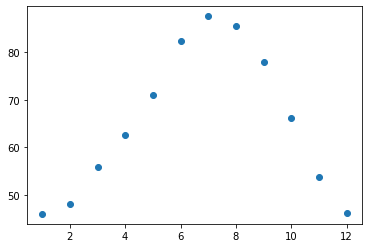

In [32]:
#solution:
plt.scatter(range(1,13), monthlyvalues[:,0])

**Solution:**  Hard to say, but a lot of these points are pretty close together!  Jan and Dec have the closest means, but many more are within a couple of degrees of one another: March/November, July/August, and Dec/Feb are quite close as well.

**D:** For each *pair* of months (a total of $\binom n2$ pairs), compute a 99% confidence interval on the difference in the mean maximum temperatutes `MaxT`.  Use the large-sample normal approximation.

Whenever 0 is inside the confidence interval for that difference in means, make note of it.

In [38]:
zcrit=stats.norm.ppf(.995)
for mo1 in range(12):
    for mo2 in range(mo1+1,12):
        meandiff=monthlyvalues[mo1,0]-monthlyvalues[mo2,0]
        pooledse=np.sqrt(monthlyvalues[mo1,1]**2/monthlyvalues[mo1,2]+monthlyvalues[mo2,1]**2/monthlyvalues[mo1,2])
        CImin=meandiff-zcrit*pooledse
        CImax=meandiff+zcrit*pooledse
#         print(mo1, mo2, CImin, CImax)
        if (CImin<0) and (CImax>0):
            print('Months', mo1+1, 'and', mo2+1, 'have a CI that includes 0')

Months 1 and 12 have a CI that includes 0


**E:** What months have "about the same" *average* maximum temperature in part **D**?  Does this match what you expected from part **C**?

**Solution:**  Only Dec and January!  Our sample size is large enough that we're pretty sure the other differences are "big enough" that they intervals don't include 0.

**F:** In the prior problem, we computed a lot of intervals, and we allowed each interval to have a confidence of 99%. What is the probability that *each and every* interval contained the true value of $\mu_A-\mu_B$?

*Hint*: this is not the same question as follows in Part G.

**Solution:**  0 or 1.  They either do or they don't.  We don't *know* the true means, but they were either inside the interval or they weren't.  This is **not random**.

**G:** Suppose we are *planning* to gather a large data set, where we will construct $\binom n2$ independent confidence intervals for the respective means $\mu_i$ of $\binom n2$ independent random samples, each of which is constructed at a 99% confidence.

What is the probability that at least one interval does not end up covering the true mean $\binom n2$ for that feature/variable?

**Solution:**  Unlike in part F, this is random.  **Before** we gather data and compute means $\bar{X}$ for each flower/feature, there is a 95\% chance that *any given* interval contains the targeted value.

We're actually asking for the probability that if we flip 12 coins with a 95% chance of heads, what is the probability we get "all heads?"

We can evalute this as a binomial, or simply note that "all heads" is the product of a set of 12 independent events with probability $.95$.